In [13]:
from random import random, randint
def variableX():
  U = random()
  V = random()
  if U < 0.4:
    if V < 0.8:
      return 0
    else:
      return 2
  elif U < 0.75:
    if V < 0.6:
      return 1
    else:
      return 3
  else:
    return 2

def metodo_urna(p=[0.32, 0.21, 0.33, 0.14], M=100):
  A = [] * 100
  for i in range(len(p)):
    for j in range(int(p[i]*M)):
      A.append(i+1)
  return A[randint(0, 99)]

a = [0,0,0,0]
b = [0,0,0,0]
nsim = 1_000_000
for i in range(nsim):
  a[variableX()] += 1
  b[metodo_urna()-1] += 1
print([i/nsim for i in a])
print([i/nsim for i in b])

[0.320388, 0.21023, 0.329098, 0.140284]
[0.319933, 0.20964, 0.330328, 0.140099]


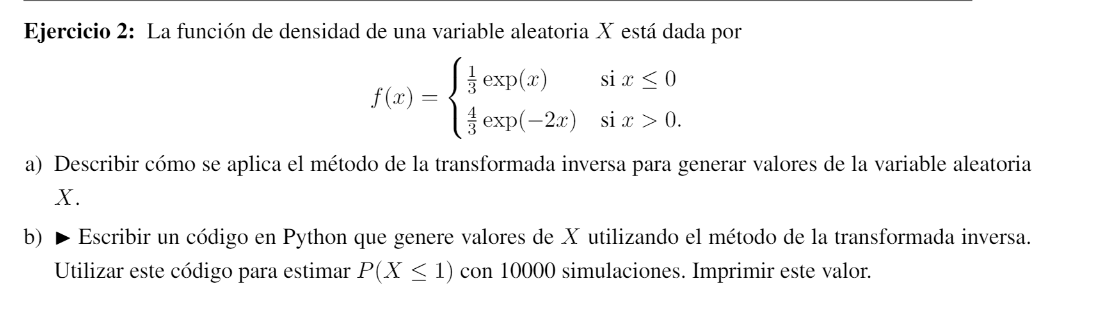

In [19]:
from numpy import log

def G():
  u = random()
  if u <= 1/3:
    return log(3*u)
  else:
    return -log((3/2) * (1-u)) / 2

def Ejercicio2(nsim=1_000_000):
  menores_que_1 = 0
  for _ in range(nsim):
    if G() <= 1:
      menores_que_1 += 1
  return menores_que_1 / nsim

Ejercicio2()

0.909771

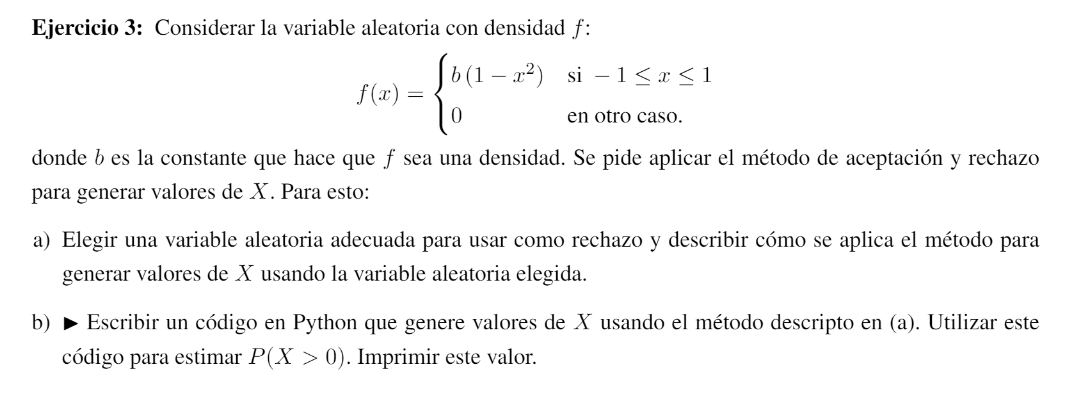

In [ ]:
#?????

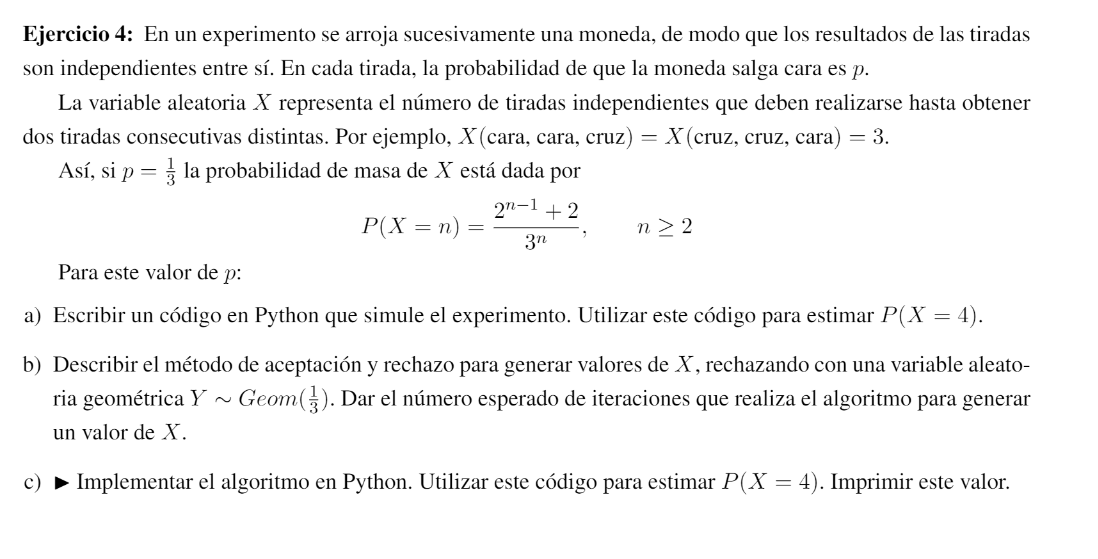

In [130]:
def experimento(p=1/3):
  res = 0
  last = ""
  while True:
    u = random()
    res += 1
    if last == "":
      if u < 1/3:
        last = "Cara"
      else:
        last = "Cruz"

    if last == "Cruz":
      if u < 1/3:
        break
    if last == "Cara":
      if u >= 1/3:
        break
  return res
"""
A = [0] * 100
for _ in range(1_000_000):
  A[experimento()] += 1
print(A)
"""

def simulacion(nsim, a):
  sum = 0
  sumAR = 0
  for _ in range(nsim):
    if experimento() == a:
      sum += 1
    if aceptacion_y_rechazo() == a:
      sumAR += 1
  return sum / nsim, sumAR / nsim

def geometrica(p):
  U = random()
  return int(log(1-U)/log(1-p))+1
def densidad_geometrica(p, x):
  return p * ((1-p)**(x-1))

def aceptacion_y_rechazo():
  j = 2
  c = ((2**(j-1) + 2) / 3**j) / (4/27)
  p = 1/3
  while True:
    u = random()
    y = geometrica(p)
    if y >=2:
      if u < (( 2**(y-1) + 2 ) / 3**y) / (c * densidad_geometrica(p, y)):
        return y

res = simulacion(1_000_000, 4)
print(res[0])
print(res[1])


0.1237
0.123858
